# Ridge Regression

If I have two variables x (independent), y (dependent). I have two points and my regression line is passing through these two points, then the model may overfits. If I add new data points that are far away from the regression line then the error will be high, and it is called overfitting.

Overfitting -> accuracy high for train data (low bias), test data has lower accuracy (high variance)

To reduce overfitting, we use ridge regression.

Ridge Regression (L2 Regularization) -> Reduce Overfitting

Cost function for Ridge Regression

We have two parameters

### Ridge Regression Cost Function

Ridge Regression is a regularized version of linear regression that includes an L2 penalty term to prevent overfitting. The cost function for Ridge Regression is given by:

$$[
J(\theta) = \frac{1}{2m} \left[ \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 + \lambda \sum_{j=1}^{n} \theta_j^2 \right]
$$]

Where:
- \( m \) is the number of training examples.
- \( n \) is the number of features.
- \$( h_\theta(x^{(i)}) \)\$ is the hypothesis function, defined as \$( h_\theta(x^{(i)}) = \theta^T x^{(i)} \)$.
- \$( y^{(i)} \)$ is the actual value for the \$( i^{th} \$ training example.
- \$( \theta_j \)\$ are the model parameters (weights).
- \$( \lambda \)\$ is the regularization parameter, which controls the strength of the penalty term.

The first term in the cost function is the Mean Squared Error (MSE), and the second term is the L2 regularization term that penalizes large values of the coefficients \( \theta_j \).


Relationship between λ and slope, if we increased the λ value the slope will be decreased.

# Lasso Regression (L1 Regularization) -> Feature Selection



Lasso Regression (Least Absolute Shrinkage and Selection Operator) is a regularized version of linear regression that includes an L1 penalty term to prevent overfitting and encourage sparsity in the model coefficients. The cost function for Lasso Regression is given by:

$$
J(\theta) = \frac{1}{2m} \left[ \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 + \lambda \sum_{j=1}^{n} |\theta_j| \right]
$$

When we increased λ the coefficient value decreased and after a particular value of λ the coefficient will be equal to 0.

# ElasticNet Regression

1- We try to reduce overfitting and then we try to reduce feature selection.


ElasticNet Regression is a regularized regression method that combines both **L1 (Lasso)** and **L2 (Ridge)** penalties. It is useful when dealing with datasets that have correlated features or when you want to balance between feature selection (L1) and regularization (L2). The cost function for ElasticNet Regression is given by:

$$
J(\theta) = \frac{1}{2m} \left[ \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 + \lambda \left( \alpha \sum_{j=1}^{n} |\theta_j| + \frac{1 - \alpha}{2} \sum_{j=1}^{n} \theta_j^2 \right) \right]
$$

# Types of Cross Validation

Data -> (Train, Test)

Training data can be used to train our model and hyperparameter tuning.

Test -> To check the performance of model based on new data

Train -> Train, Validation

For splitting train data into train, validation we use cross validation.


#### 1. Leave One Out Cross Validation (LOOCV)

Suppose there are 500 records in training data. For cv = 1, first record will be put in my validation data and remaining records will be used as train data. In Exp 2, second record will be validation and all other records will be train data and so on....

As the data size increases, the complexity of training the model also increases.

This model leads to overfitting, accuracy will be high on training data, and accuracy will be low on validation data because validation data is very small.


#### 2. Leave P out Cross Validation

We leave p records as validation.


#### K-Fold Cross Validation

Train data size = 500

K = 5

Validation Size = 500/5 == 100

CV = 1, first 100 records will be validation data and rest will be training data.

CV = 2, 101-200 records will be validation data and rest will be training data.


CV = 5, 401-500 records will be my validation data and rest will be my training data.


The problem, with K-fold is that there may be high possibility that one category may come in validation data for binary classification problem.


#### Stratified K-Fold Cross Validation


K = 5, Train Size = 500, Validation Size = 500/5 = 100

When the validation data is selected, make sure that equal amount of records for each category will be selected.


#### 5. Time Series Cross Validation

Product Sentiment Analysis

Reviews are based on time. (Jan -> Dec)

Day1     Day2   Day3    Day4


We divide our dataset based on number of days.





# Algerian Forest Fires Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/das-amlan/Forest-Fire-Prediction/refs/heads/main/forest_fires.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [2]:
df.shape

(243, 15)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int64  
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 28.6 KB


### Data Cleaning

In [4]:
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [5]:
df["Region"].unique()

array([1, 2])

In [6]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [7]:
#fix spaces in column names
df.columns = df.columns.str.strip()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int64  
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 28.6 KB


## EDA and Feature Engineering

In [9]:
#remove day, month, year columns and save into df_copy
df_copy = df.drop(["day", "month", "year"], axis = 1)

In [10]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [11]:
df["Classes"].value_counts()

,count
Classes,
1,137
0,106


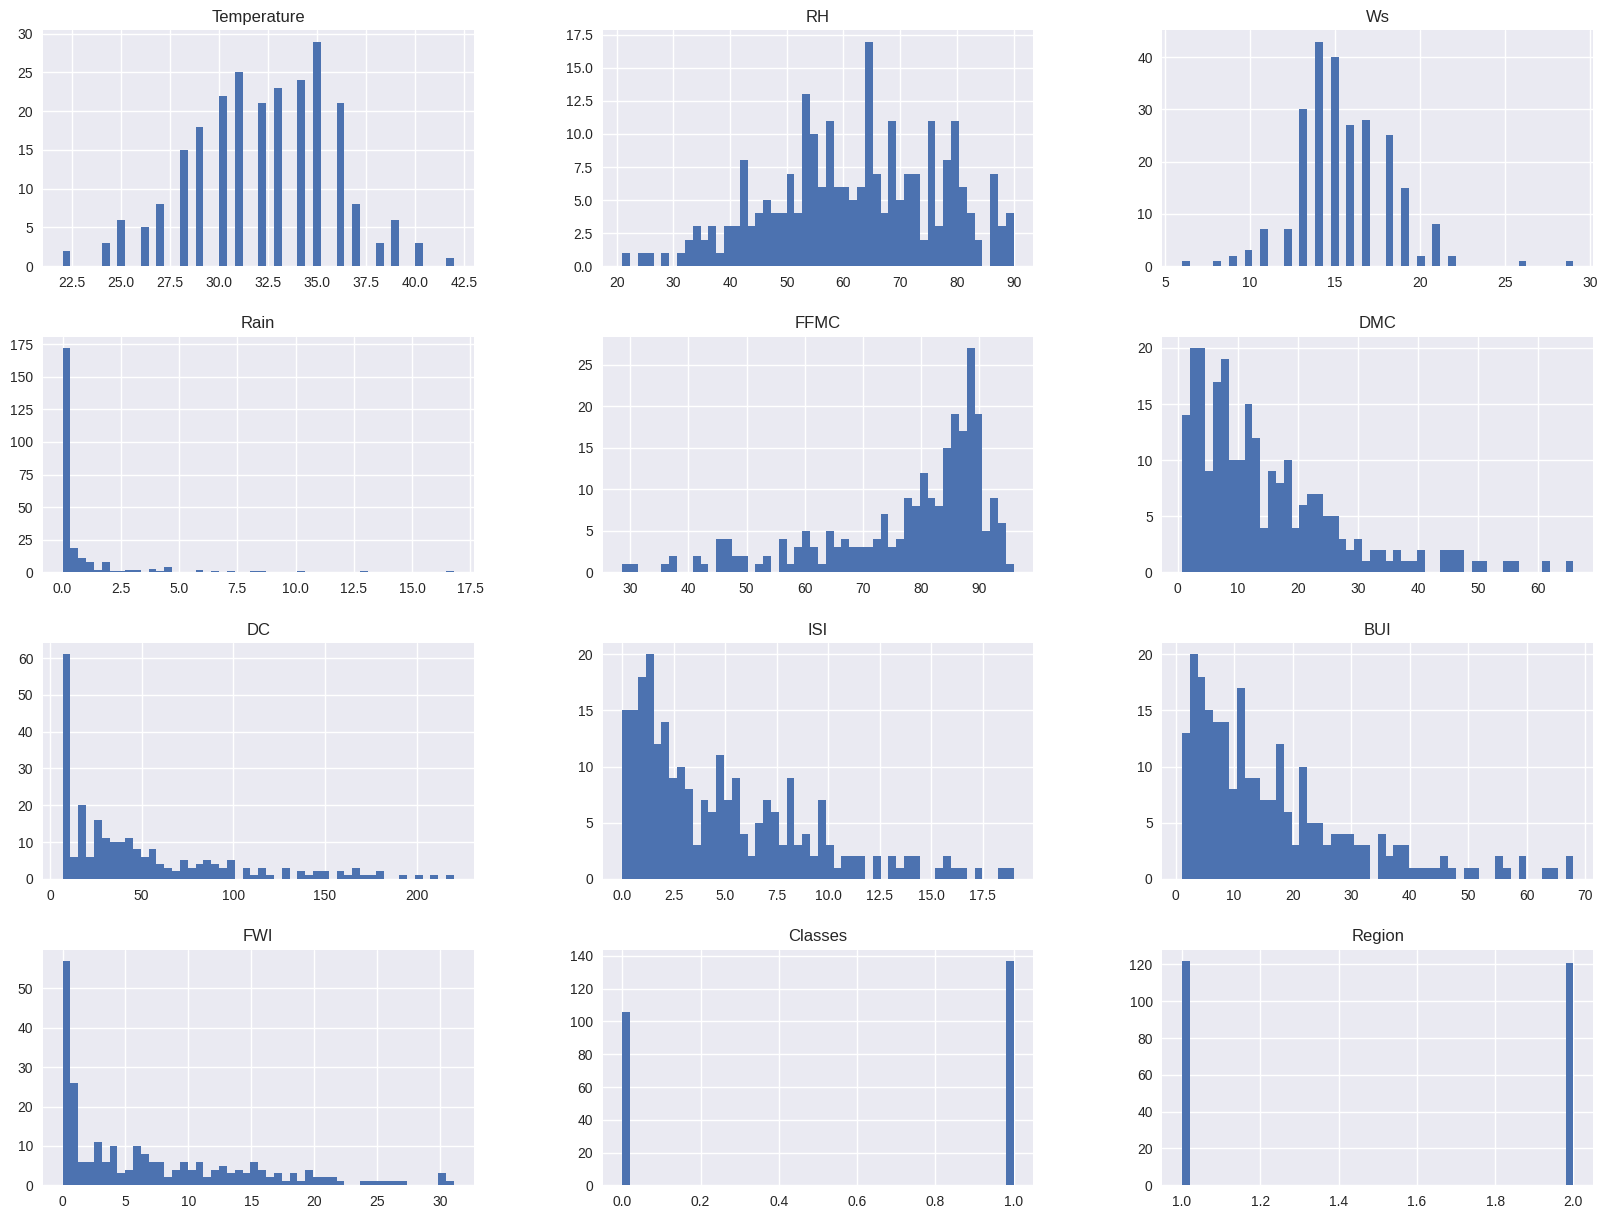

In [12]:
## plot density plot for all features
plt.style.use("seaborn-v0_8")
df_copy.hist(bins = 50, figsize = (20, 15))
plt.show()

In [13]:
## Percentage for Pie Chart
df_copy["Classes"].value_counts(normalize = True) * 100

,proportion
Classes,
1,56.378601
0,43.621399


Text(0.5, 1.0, 'Pie Chart of Classes')

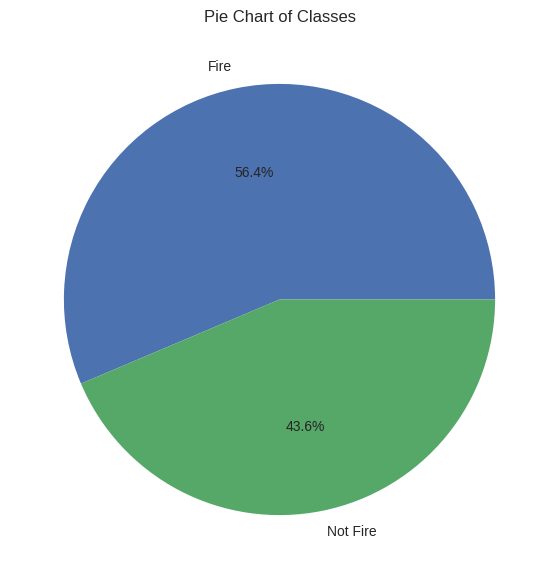

In [14]:
# plotting pie chart
percentage = df_copy["Classes"].value_counts(normalize = True) * 100
classlabels = ["Fire", "Not Fire"]
plt.figure(figsize = (12, 7))
plt.pie(percentage, labels = classlabels, autopct = "%1.1f%%")
plt.title("Pie Chart of Classes")

In [15]:
## Correlation
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

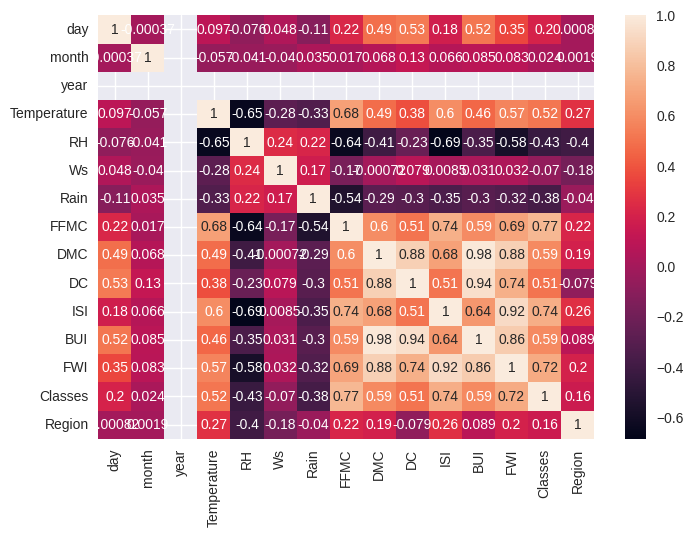

In [16]:
sns.heatmap(df.corr(), annot = True)

<Axes: ylabel='FWI'>

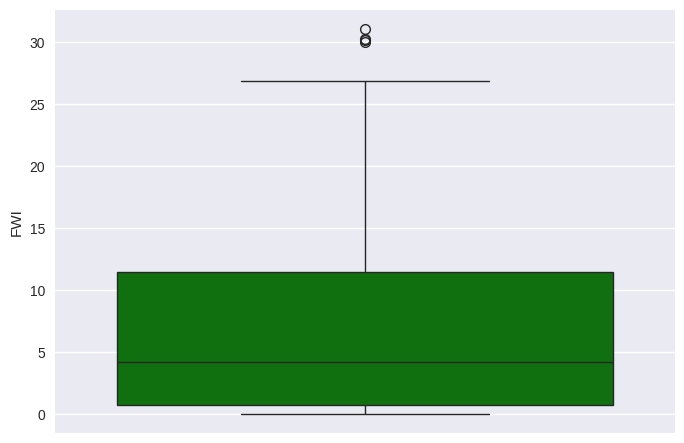

In [17]:
## Box Plots
sns.boxplot(y = df["FWI"], color = "green")

Text(0.5, 1.0, 'Fire Analysis of Sidi - Bel Region')

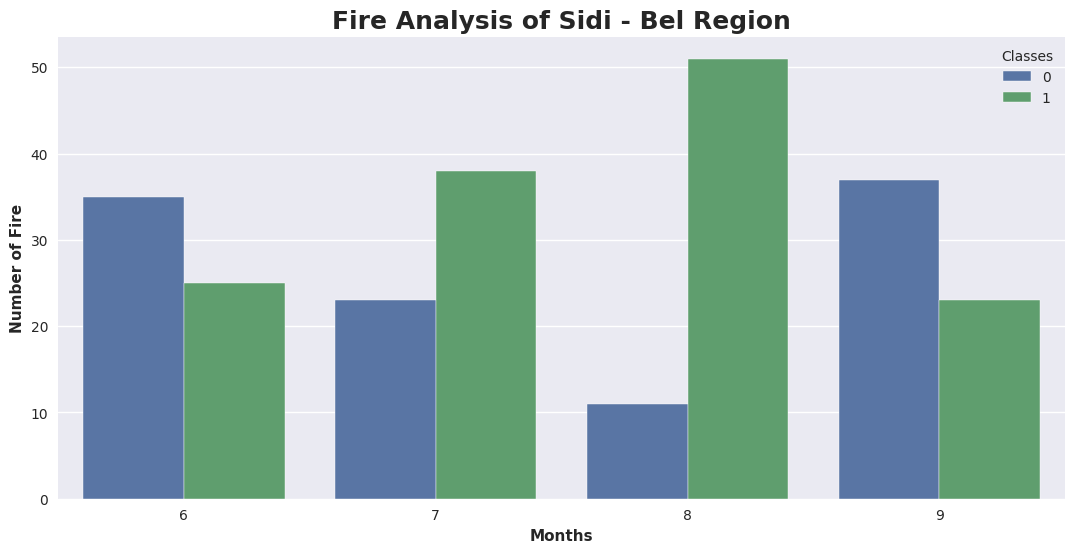

In [18]:
## Monthly Fire Analysis
dftemp = df.loc[df["Region"] == 1]
plt.subplots(figsize = (13,6))
sns.set_style("whitegrid")
sns.countplot(x = "month", hue = "Classes", data = df)
plt.ylabel("Number of Fire", weight = "bold")
plt.xlabel("Months", weight = "bold")
plt.title("Fire Analysis of Sidi - Bel Region", weight = "bold", fontsize = 18)

Text(0.5, 1.0, 'Fire Analysis of Bejaia Region')

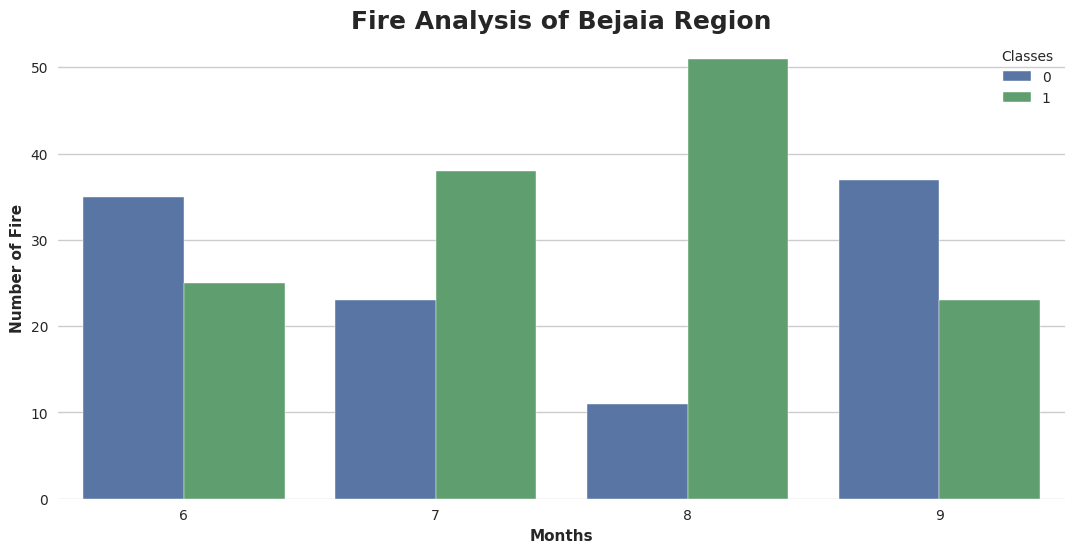

In [19]:
## Monthly Fire Analysis
dftemp = df.loc[df["Region"] == 0]
plt.subplots(figsize = (13,6))
sns.set_style("whitegrid")
sns.countplot(x = "month", hue = "Classes", data = df)
plt.ylabel("Number of Fire", weight = "bold")
plt.xlabel("Months", weight = "bold")
plt.title("Fire Analysis of Bejaia Region", weight = "bold", fontsize = 18)

It is observed that Augest and September has the most number of forest fires for both regions, and from the above plots we can unserstand that:

i. Most of the fires happened in August and very high Fires happened in only 3 months - June, July, and August.

ii. Less Fires happened in September.

## Model Training

In [20]:
df["Classes"].value_counts()

,count
Classes,
1,137
0,106


In [21]:
## Separate input and output features
X = df_copy.drop(["FWI"], axis = 1)
y = df_copy["FWI"]

In [22]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [23]:
# Feature Selection Based on Correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

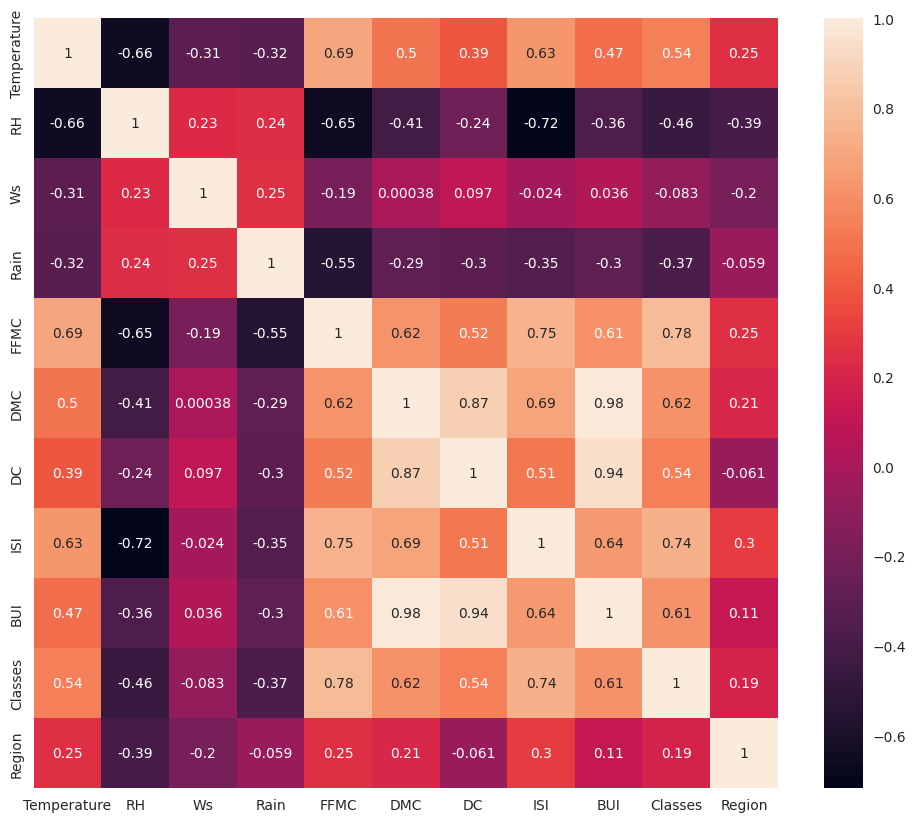

In [24]:
## Check for multicollinearity
plt.figure(figsize = (12, 10))
corr = X_train.corr()
sns.heatmap(corr, annot = True)

In [25]:
#function for correlation
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] > threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

## Threshold -- Domain Expertise
correlation(X_train, 0.85)

{'BUI', 'DC'}

In [26]:
## drop BUI and DC to remove multicollinearity

X_train.drop(columns = ["BUI", "DC"], axis = 1, inplace = True)
X_test.drop(columns = ["BUI", "DC"], axis = 1, inplace = True)

In [27]:
## Feature Scaling or Standardization
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

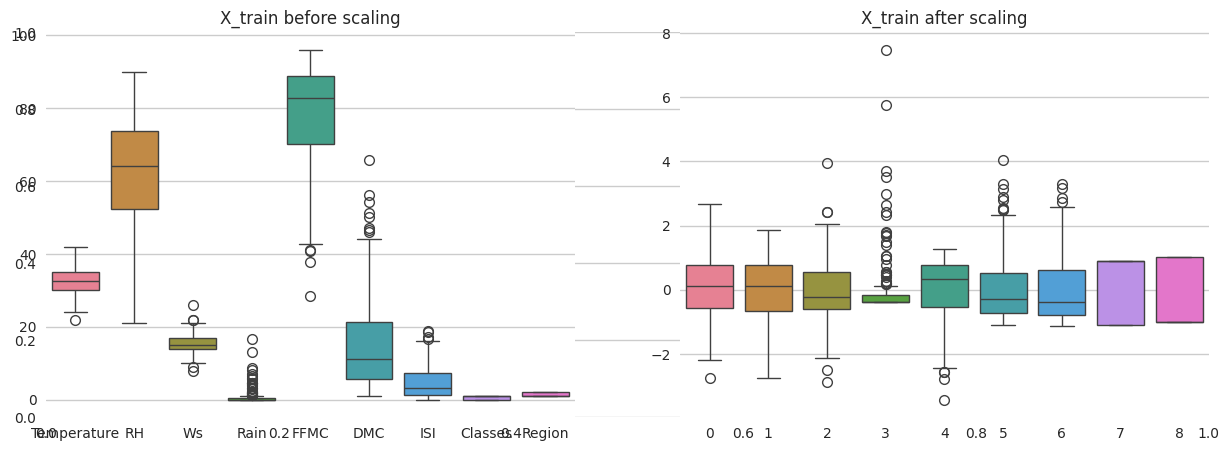

In [28]:
## Box plots to understand effect of standard scaler
plt.subplots(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data = X_train)
plt.title("X_train before scaling")
plt.subplot(1, 2, 2)
sns.boxplot(data = X_train_scale)
plt.title("X_train after scaling")
plt.show()

# Linear Regression Model

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scale, y_train)

LinearRegression()

In [30]:
y_pred = lr.predict(X_test_scale)

In [31]:
from sklearn.metrics import mean_absolute_error, r2_score
lr_mae = mean_absolute_error(y_test, y_pred)
lr_score = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {lr_mae}")
print(f"R-squared: {lr_score}")

Mean Absolute Error: 0.5468236465249986
R-squared: 0.9847657384266951


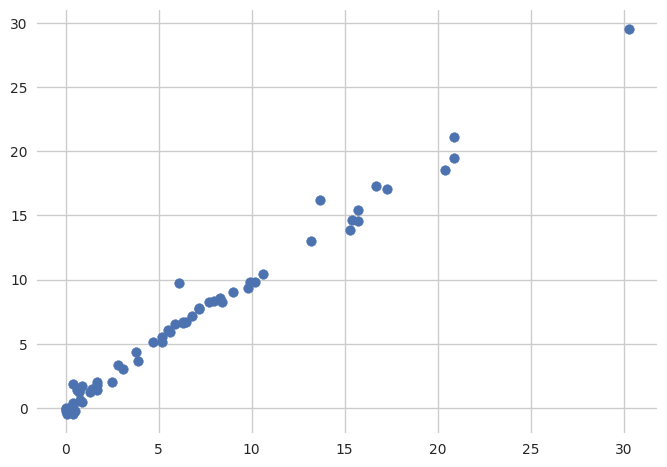

In [32]:
plt.scatter(y_test, y_pred)

# Lasso Regression Model

In [33]:
## Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scale, y_train)
y_pred = lasso.predict(X_test_scale)
from sklearn.metrics import mean_absolute_error, r2_score
lasso_mae = mean_absolute_error(y_test, y_pred)
lasso_score = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {lasso_mae}")
print(f"R-squared: {lasso_score}")

Mean Absolute Error: 1.133175994914409
R-squared: 0.9492020263112388


# Ridge Regression Model

In [34]:
## Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scale, y_train)
y_pred = ridge.predict(X_test_scale)
from sklearn.metrics import mean_absolute_error, r2_score
ridge_mae = mean_absolute_error(y_test, y_pred)
ridge_score = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {ridge_mae}")
print(f"R-squared: {ridge_score}")

Mean Absolute Error: 0.5642305340105692
R-squared: 0.9842993364555513


# ElasticNet Regression

In [35]:
## ELasticNet Regression
from sklearn.linear_model import ElasticNet
el = ElasticNet()
el.fit(X_train_scale, y_train)
y_pred = el.predict(X_test_scale)
from sklearn.metrics import mean_absolute_error, r2_score
el_mae = mean_absolute_error(y_test, y_pred)
el_score = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {el_mae}")
print(f"R-squared: {el_score}")

Mean Absolute Error: 1.8822353634896005
R-squared: 0.8753460589519703


# Cross Validation Lasso

In [36]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv =5)
lassocv.fit(X_train_scale, y_train)

LassoCV(cv=5)

In [37]:
lassocv.predict(X_test_scale)

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

In [38]:
lassocv.alpha_

0.05725391318234408

In [39]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

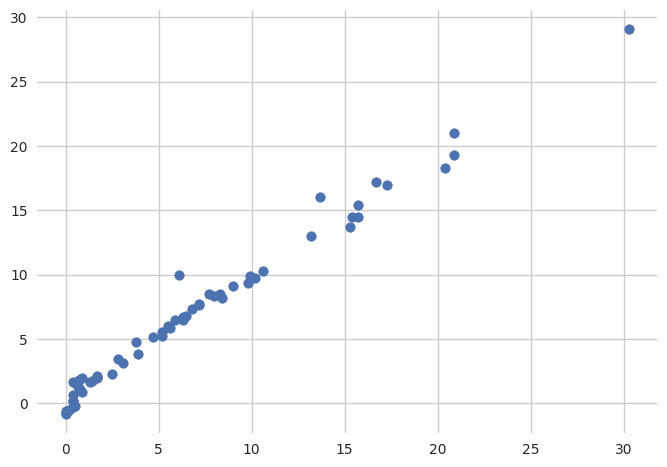

In [40]:
y_pred = lassocv.predict(X_test_scale)
plt.scatter(y_test, y_pred)

In [41]:
lasso_mae = mean_absolute_error(y_test, y_pred)
lasso_score = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {lasso_mae}")
print(f"R-squared: {lasso_score}")

Mean Absolute Error: 0.619970115826343
R-squared: 0.9820946715928275


# Ridge Regression CV

In [42]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(X_train_scale, y_train)

RidgeCV(cv=5)

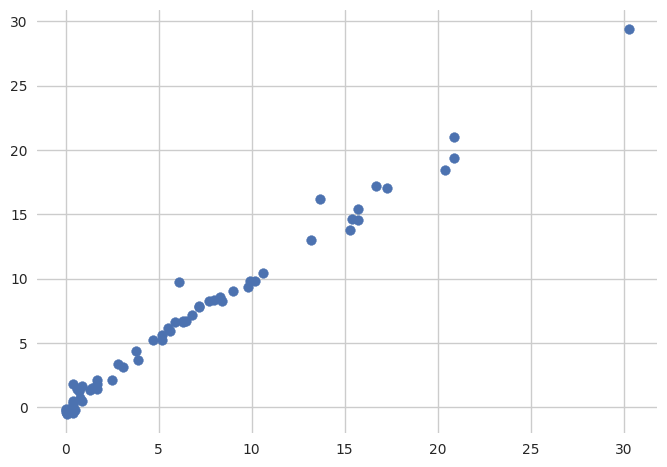

In [43]:
y_pred = ridgecv.predict(X_test_scale)
plt.scatter(y_test, y_pred)

In [44]:
ridge_mae = mean_absolute_error(y_test, y_pred)
ridge_score = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {ridge_mae}")
print(f"R-squared: {ridge_score}")

Mean Absolute Error: 0.5642305340105692
R-squared: 0.9842993364555513


In [45]:
ridgecv.alpha_

1.0

# ElasticNet CV

In [46]:
from sklearn.linear_model import ElasticNetCV
elcv = ElasticNetCV()
elcv.fit(X_train_scale, y_train)

ElasticNetCV()

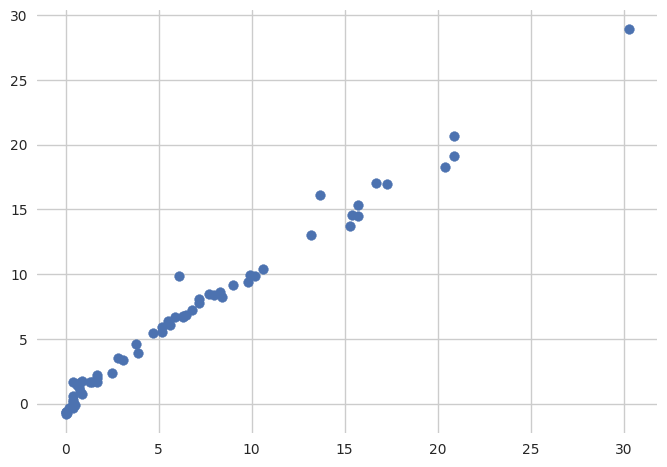

In [47]:
y_pred = elcv.predict(X_test_scale)
plt.scatter(y_test, y_pred)

In [48]:
elcv_mae = mean_absolute_error(y_test, y_pred)
elcv_score = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {elcv_mae}")
print(f"R-squared: {elcv_score}")

Mean Absolute Error: 0.6575946731430898
R-squared: 0.9814217587854941


In [49]:
#pickle the machine learning models, preprocessing the standard scaler
scale

StandardScaler()

In [51]:
import pickle
pickle.dump(scale, open("scaler.pkl", "wb"))

In [52]:
pickle.dump(ridge, open('ridge.pkl', "wb"))